# Reinforcement Learning

# Index

- [1. Introduction](#1.-Introduction)
    - [1.1 Interaction Loop](#1.1-Interaction-Loop)
    - [1.2 Return](#1.2-Return)
    - [1.3 Gymnasium](#1.3-Gymnasium)
- [2. Model Based Learning](#2.-Model-Based-Learning)
    - [2.1 Markov Decision Process](#2.1-Markov-Decision-Process)
    - [2.2 Policies](#2.2-Policies)
    - [2.3 Action-value Functions](#2.3-Action-value-Functions)
    - [2.4 Policy and Value Iteration](#2.4-Policy-and-Value-Iteration)

[Back to top](#Index)


## 1. Introduction

[Back to top](#Index)

### 1.1 Interaction Loop

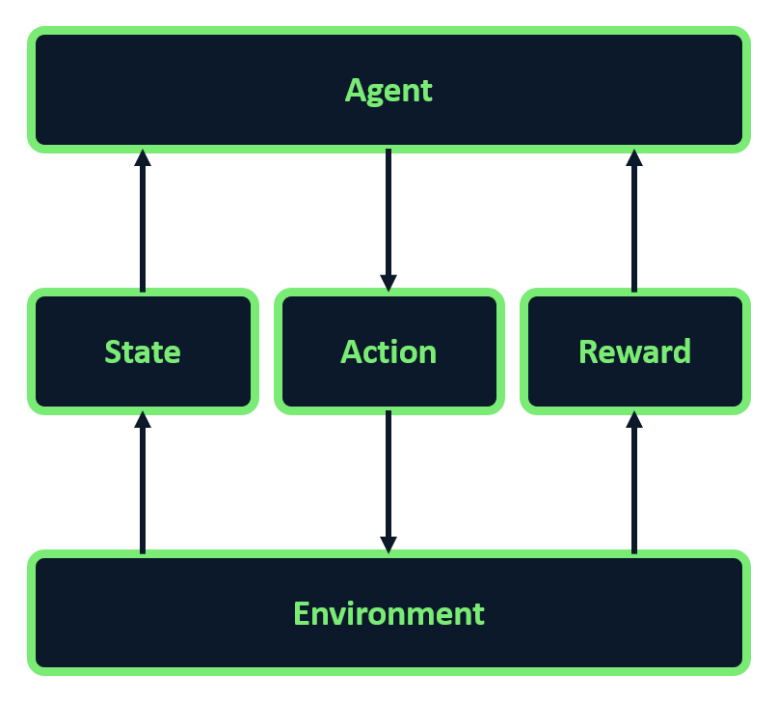


In [ ]:
# Pseudocode
env = create_environment()
state = env.get_initial_state()

for i in range(n_iterations):
    action = choose_action(state)
    state, reward = env.execute(action)
    update_knowledge(state, action, reward)

[Back to top](#Index)

### 1.2 Return
Episodic Tasks (Task segmented in Episodes) & Continuous Tasks (Continuous Interactions)
For return, the agent strives to accumulate the highest total reward over time.

<b>Return: </b> Sum of all rewards the agent expects to accumulate throughout its journey. <br>
$Return = r_1 + r_2 + r_3 ....$

<b>Discount Return: </b> Immediate rewards are more valuable than future ones. <br>
$Discount Return = r_1 + \gamma r_2 + \gamma^2 r_3 + ... + \gamma^{n-1} r_n$, where <br>
Discount Factor($\gamma$): Discounts future rewards. Have value between 0 and 1.
Used to <b>balance immediate and long-term rewards.</b>

In [6]:
# Code to calculate return:
import numpy as np
expected_rewards = np.array([1, 6, 3])
discount_factor = 0.9
discounts = np.array([discount_factor ** i for i in range(len(expected_rewards))])
print(f"Discounts: {discounts}")

discounted_return = np.sum(expected_rewards * discounts)
print(f"Discount Return: {discounted_return}")

Discounts: [1.   0.9  0.81]
Discount Return: 8.83


[Back to top](#Index)

### 1.3 Gymnasium
Key Environments: CartPole, MountainCar, FrozenLake, Taxi

In [4]:
import gymnasium as gym
import matplotlib.pyplot as plt

env = gym.make('CartPole-v1', render_mode='rgb_array')
# env = gym.make('FrozenLake-v1', render_mode='rgb_array')
state, info = env.reset(seed=42)
print(state)

def render():
    state_image = env.render()
    plt.imshow(state_image)
    plt.show()

[ 0.0273956  -0.00611216  0.03585979  0.0197368 ]


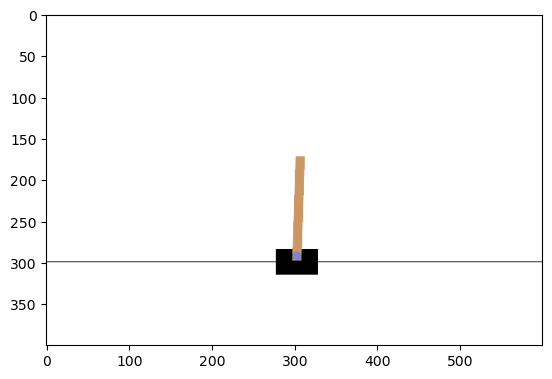

In [5]:
render()

In [18]:
# 0 : move left, 1 : move right
action = 1
state, reward, terminated, truncated, info = env.step(action)
print(f"State : {state}")
print(f"Reward : {reward}")
print(f"Terminated : {terminated}")

State : [ 0.03104291  0.38306385  0.03102613 -0.5424507 ]
Reward : 1.0
Terminated : False


In [5]:
import gym
import pygame
import matplotlib.pyplot as plt

env = gym.make('CartPole-v1', new_step_api=True)
state = env.reset()
env.render()

# Initialize Pygame
pygame.init()
screen = pygame.display.set_mode((400, 300))
pygame.display.set_caption('CartPole Keyboard Control')
clock = pygame.time.Clock()
frame_rate = 120

# Main loop
running = True
while running:
    # Handle events
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_LEFT:
                action = 0
            elif event.key == pygame.K_RIGHT:
                action = 1

            state, reward, terminated, truncated, info = env.step(action)
            env.render()
            if terminated:
                state = env.reset()

    pygame.display.flip()
    clock.tick(frame_rate)

pygame.quit()
env.close()

[Back to top](#Index)


## 2. Model Based Learning

[Back to top](#Index)

### 2.1 Markov Decision Process
Four key components: <b>States, Actions, Rewards, Transition Probabilities</b><br>
<b>Markov Property: </b>Future state depends only on current state and action.<br>

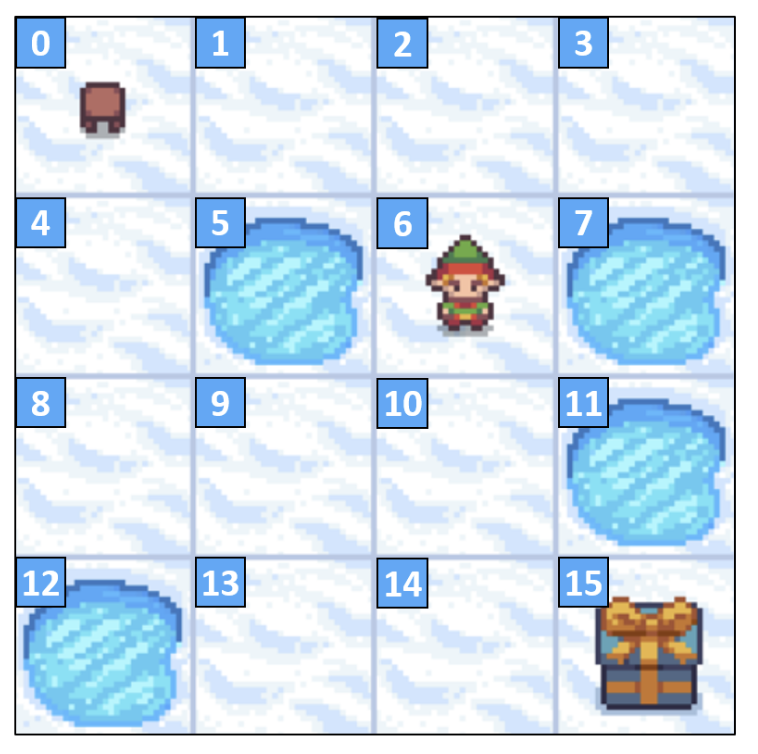 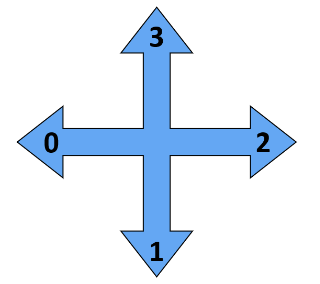

In [24]:
# Gymnasium states and actions
import gymnasium as gym
env = gym.make('FrozenLake-v1', render_mode='rgb_array', is_slippery=True)

In [7]:
print(env.action_space)

Discrete(4)


In [8]:
print(env.observation_space)

Discrete(16)


In [19]:
print("Numbers of actions: ", env.action_space.n)

Numbers of actions:  4


In [20]:
print("Numbers of states: ", env.observation_space.n)

Numbers of states:  16


env.unwrapped.P is a dictionary where keys are state-action pairs. <br>
It returns related information of doing the exact action on such state: <br>

In [27]:
"""
>>> env.unwrapped.p[state][action]

[
    (probability 1, next_state_1, reward_1, is_terminal_1)
    (probability 2, next_state_2, reward_2, is_terminal_2)
    etc... <br>
]
"""
state = 6
action = 0
print(env.unwrapped.P[state][action])

[(0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 5, 0.0, True), (0.3333333333333333, 10, 0.0, False)]


[Back to top](#Index)

### 2.2 Policies
After declaring the policies (and $\gamma$), we can calculate the $return$ of each state. <br><br>

<b>Policies:</b><br>
A dictionary matching each $state$ to $action$

<b>State-value Function:</b><br>
$V(s) = r_{s+1} + \gamma r_{s+2} + \gamma^2 r_{s+3} +...$ <br>
Requirements: Having state s and following a policy. <br><br>

<b>Bellman Equation:</b><br>
A recursive formula of calculating state-values. <br>
$V(s) = r_{s+1} + \gamma V(s+1)$

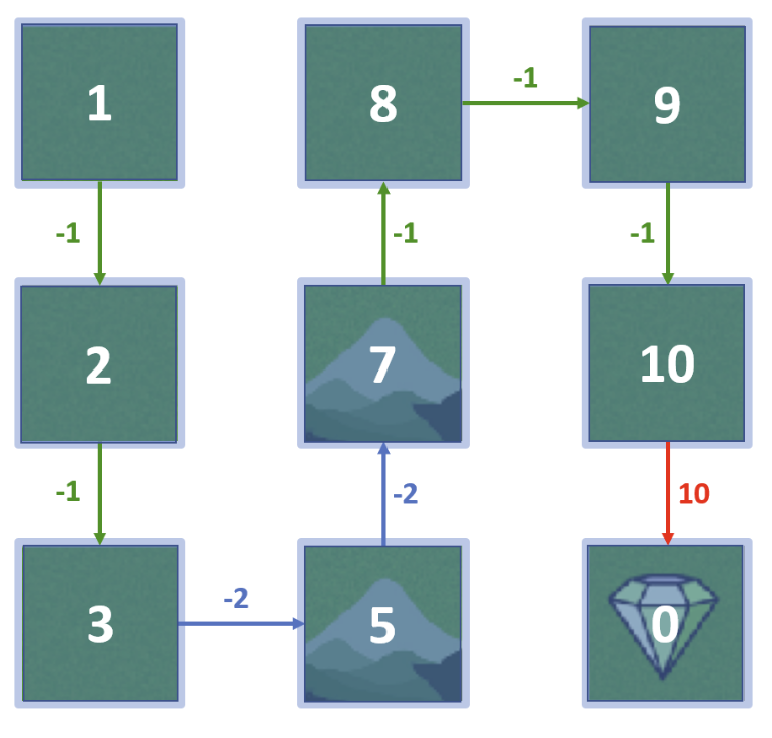

In [ ]:
policy = {0:1, 1:2, 2:1, 3:1, 4:3, 5:1, 6:2, 7:3}
state, info = env.reset()
terminated = false
while not terminated:
    action = policy[state]
    state, reward, terminated, _, _ = env.step(action)

In [ ]:
# Computing state-value
def compute_state_value(state):
    if state == terminal_state:
        return 0

    action = policy(state)
    _, next_state, reward, _ = env.unwrapped.P[state][action][0]
    return reward + gamma * compute_state_value(next_state)

In [ ]:
terminal_state = 8
gamma = 1
V = {state: compute_state_value(state) for state in range(num_states)}
print(V)

[Back to top](#Index)

### 2.3 Action-value Functions
Goal: How to improve policies?<br>
Action-value is also known as <b>Q-values</b>, which is the expected return of: <br>
Starting at state s, taking action a, following the policy. <br>
$Q(s, a) = r_a + \gamma V(s+1)$ <br>
It breaks down further than state-value and estimates the desirability of actions within states.

In [ ]:
def computing_q_values(state, action):
    if state == terminal_state:
        return None
    _, next_state, reward, _ = env.unwrapped.P[state][action][0]
    return reward + gamma * compute_state_value(next_state)

Q = {(state, action) : compute_q_value(state, action)
     for state in range(num_states)
     for action in range(num_actions)}

In [ ]:
# Then improve the policy by choosing the highest value and related action from each state
improved_policy = {}

for state in range(num_states-1):
    max_action = max(range(num_actions), key=lambda action: Q[(state, action)])
    improved_policy[state] = max_action

print(improved_policy)

### 2.4 Policy and Value Iteration
Policy Iteration Algorithm & Value Iteration Algorithm

In [ ]:
# Policy Iteration
# Initialize Policy -> Evaluate Policy <-> Improve Policy (until policy stops changing) -> Optimal Policy

policy = {0:1, 1:2, 2:1, 3:1, 4:3, 5:1, 6:2, 7:3}
def policy_evaluation(policy):
    V = {state : compute_state_value(state, policy) for state in range(num_states)}
    return V

In [ ]:
def policy_improvement(policy):
    improved_policy = {s : 0 for s in range(num_states-1)}
    Q = {(state, action) : compute_q_values(state, action, policy)
        for state in range(num_states)
        for action in range(num_actions)}

    for state in range(num_states-1):
        max_action = max(range(num_actions), key=lambda action : Q[(state, action)])
        improved_policy[state] = max_action

    return improved_policy

In [ ]:
def policy_iteration():
    policy = {0:1, 1:2, 2:1, 3:1, 4:3, 5:1, 6:2, 7:3}
    while True:
        V = policy_evaluation(policy)
        improved_policy = policy_improvement(policy)

        if improved_policy == policy:
            break
        policy = improved_policy

        return policy, V

In [ ]:
# Value Iteration combines policy evaluation and improvement in one step
# 1, Compute optimal state-value function
# 2, Derive policy from it
# Initialize state-values -> Compute Q-values using V <-> Update V by selecting best actions -> Optimal V and policy
V = {state : 0 for state in range(num_states)}
policy = {state : 0 for state in range(num_states-1)}
threshold = 1e-3

while True:
    new_V = {state : 0 for state in range(num_states)}
    for state in range(num_states-1):
        max_action, max_q_value = get_max_action_and_value(state, V)
        policy[state] = max_action
        new_V[state] = max_q_value

    if all(abs(new_V[state] - V[state]) < threshold for state in V):
        break

    V = new_V

def get_max_action_and_value(state, V):
    Q_values = [compute_q_value(state, action, V) for action in range(num_actions)]
    max_action = max(range(num_actions), key=lambda action : Q_values[action])
    max_q_value = Q_values[max_action]
    return max_action, max_q_value

def compute_q_value(state, action, V):
    if state == terminal_state:
        return None
    _, next_state, reward, _ = env.P[state][action][0]
    return reward + gamma * V[next_state]